## **Heart Disease Data Set**
---

This project consists of several stages aimed at training machine learning models on a highly imbalanced dataset. The main steps followed to develop and evaluate the model include:

1. **Exploratory data analysis (EDA)** - Understanding the distribution, patterns, and correlations within the data.
2. **Data preprocessing** - Handling missing values, encoding categorical variables, feature scaling, and addressing class imbalance.
3. **Model Training and Evaluation** – Training multiple ML models and performing a comparative analysis of their performance.
---

### __Prerequisites__

In [12]:
# Necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from helper_Plots import HelperPlots

# Defining paths for datasets
HEART_DATASET_PATH_TRAIN        = 'datasets/heart_4_train.csv'
HEART_DATASET_PATH_TEST         = 'datasets/heart_4_test.csv'

# Paths for plots and tables
HEART_CONTINUE_VARS_TABLE   = 'tables/heart_continuous.png'
HEART_DISCRETE_VARS_TABLE   = 'tables/heart_discrete.png'
HEART_CONTINUE_VARS_BOXPLOT = 'plots/boxplot_continuous_heart.png'
HEART_DISCRETE_VARS_BARPLOT = 'plots/barplot_discrete_heart.png'
HEART_LABEL_VARS_BARPLOT    = 'plots/barplot_label_heart.png'
HEART_CORRELATION_MATRIX_CONTINUOUS    = 'correlation/heart_correlation_continuous.png'
HEART_CORRELATION_MATRIX_DISCRETE      = 'correlation/heart_correlation_discrete.png'
HEART_CHI_SQUARE_RESULTS               = 'correlation/chi_square_results_heart.png'

---

### __Exploratory data analysis__

In [13]:
# Labels for the attributes in the heart disease dataset
DISCRETE = 'discrete'
CONTINUE = 'continuous'
LABEL    = 'label' # This is the label for the classification task

attribute_labels = {
    'blood_pressure_medication' : DISCRETE,
    'cholesterol_level': CONTINUE,
    'stroke_history' : DISCRETE,
    'systolic_pressure' : CONTINUE,
    'hypertension_history' : DISCRETE,
    'daily_cigarettes' : CONTINUE,
    'diastolic_pressure' : CONTINUE,
    'heart_rate' : CONTINUE,
    'smoking_status' : DISCRETE,
    'diabetes_history' : DISCRETE  ,
    'mass_index' : CONTINUE,
    'blood_sugar_level' : CONTINUE,
    'age' : CONTINUE,
    'education_level' : DISCRETE,
    'gender' : DISCRETE,
    'sleep_heart_rate' : CONTINUE,
    'ldl_cholesterol' : CONTINUE,
    'high_blood_sugar' : DISCRETE,
    'chd_risk' : LABEL
}

In [14]:
df_train = pd.read_csv(HEART_DATASET_PATH_TRAIN)
df_test  = pd.read_csv(HEART_DATASET_PATH_TEST)

dataset  = pd.concat([df_train, df_test], ignore_index=True)

To begin the dataset exploration, we will perform structured visual and statistical analysis:
- **Continuous** features will be visualized using boxplots to assess their value distributions and _identify potential outliers_.
- **Discrete** features will be explored through barplots, providing insight into the frequency of each category.
- The **target label** will be analyzed as well via a barplot to observe class imbalance, if any.
- Afterwards, a **correlation matrix** for each variable category will be plotted, to examine linear relationships.
- Lately, a **chi-squared test** will be used to assess associations among discrete features.

### 1.1. Plotting the continuous features

Table for continuous variables


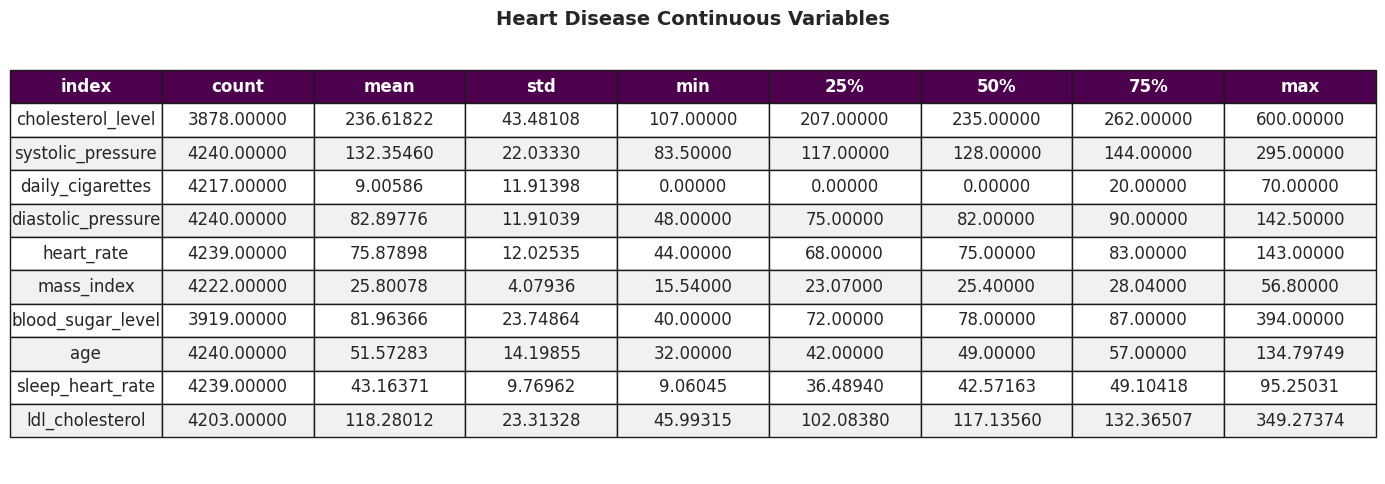

Boxplot for continuous variables


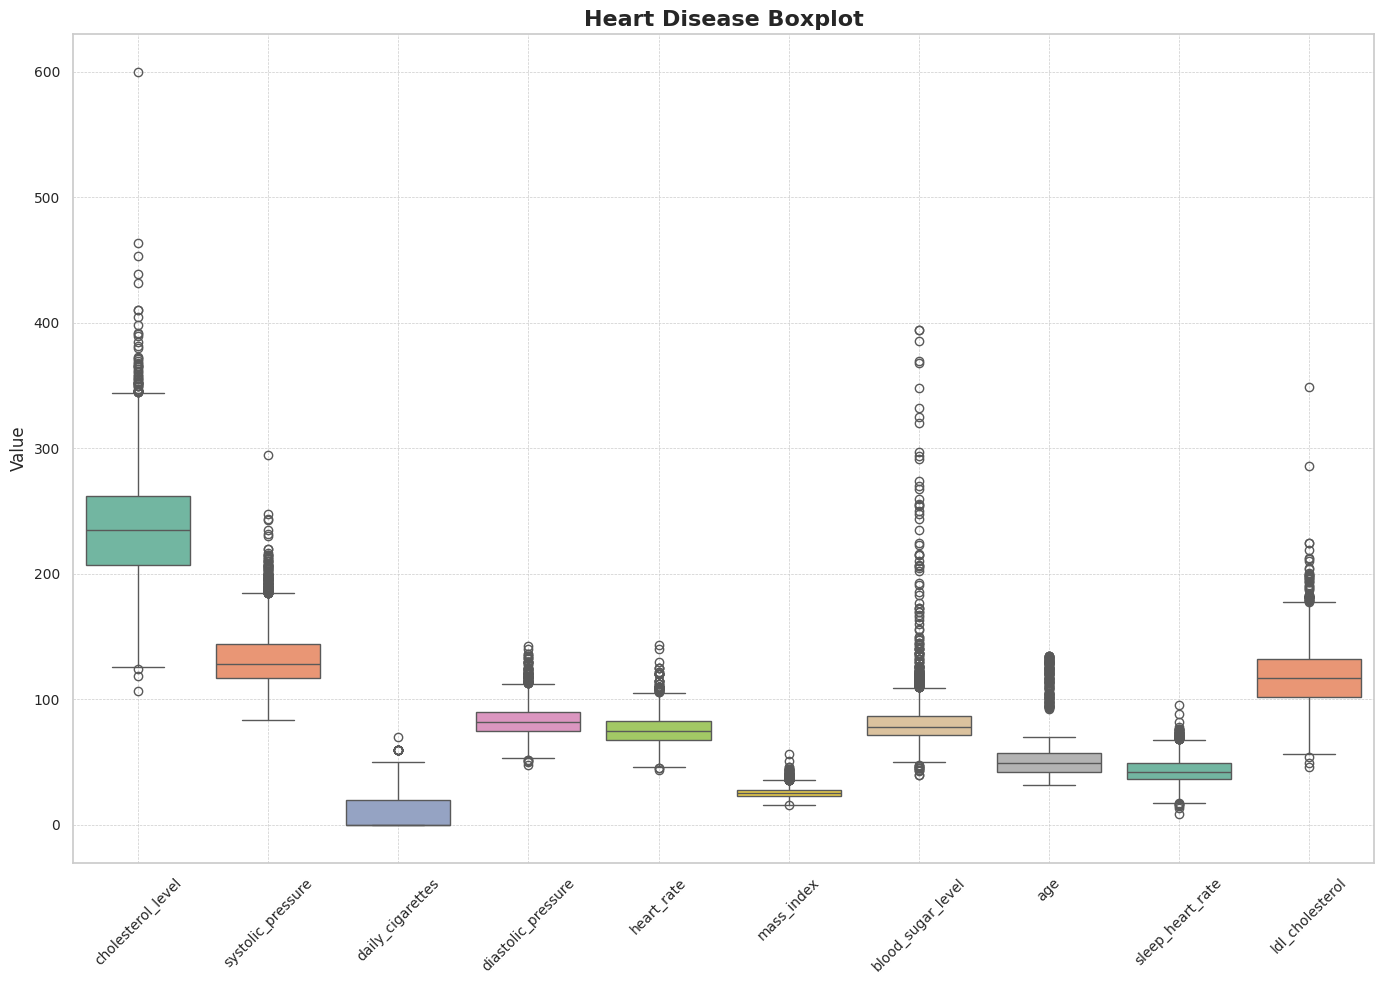

In [ ]:
def get_attribute_statistics_continuous(dataset: pd.DataFrame):
    continuous_values = [col for col in dataset if attribute_labels[col]==CONTINUE]

    print("Table for continuous variables")
    HelperPlots.plot_description_table(dataset[continuous_values].describe().T.reset_index(),title="Heart Disease Continuous Variables", outputname=HEART_CONTINUE_VARS_TABLE, figsize=(14, 5))
    
    print("Boxplot for continuous variables")
    HelperPlots.plot_boxplot_for_continuous(dataset[continuous_values], title="Heart Disease Boxplot", outputname=HEART_CONTINUE_VARS_BOXPLOT, figsize=(14, 10))

get_attribute_statistics_continuous(dataset)

### 1.2. Plotting the discrete features

Description table for discrete variables:


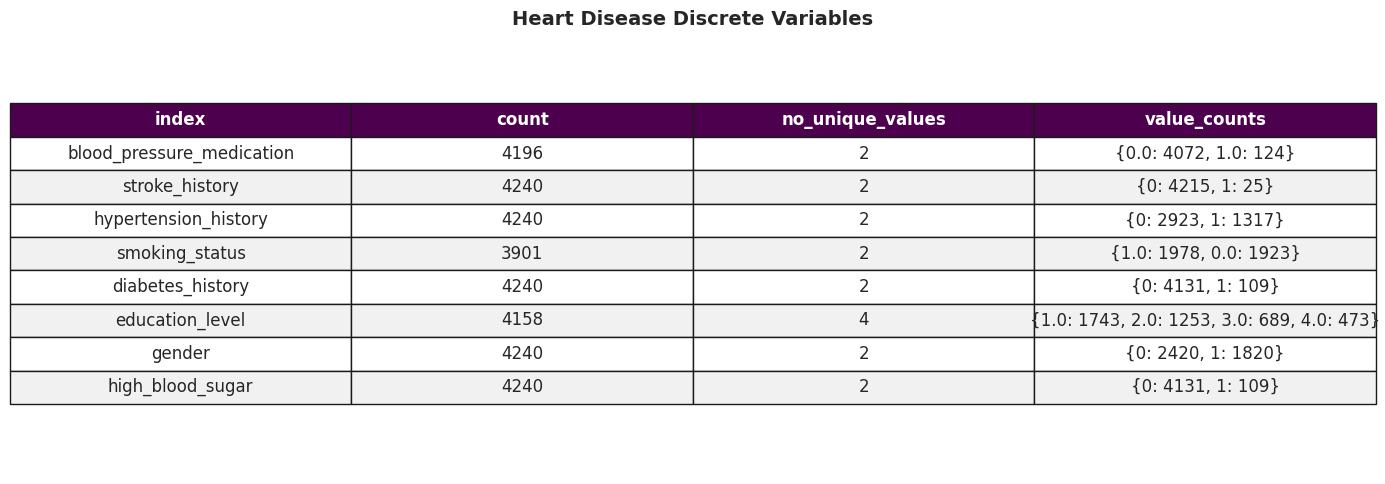

Barplots for discrete variables:


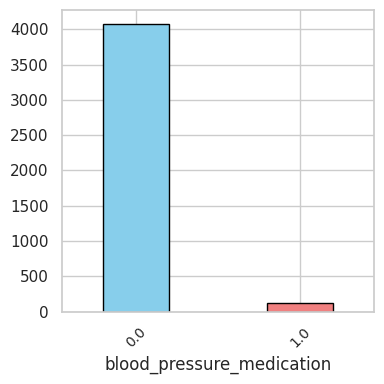

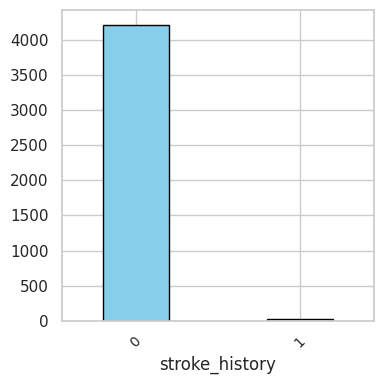

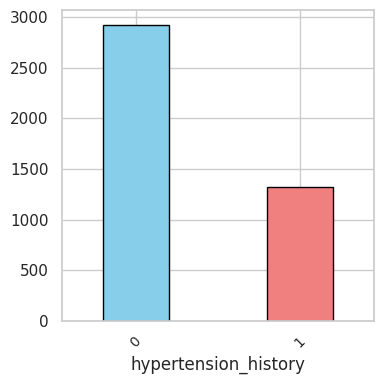

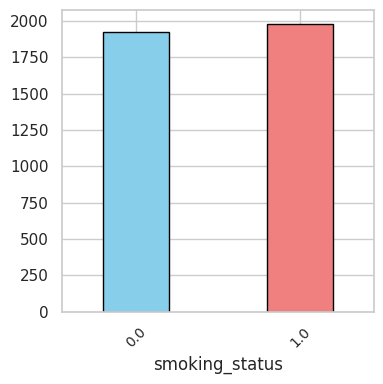

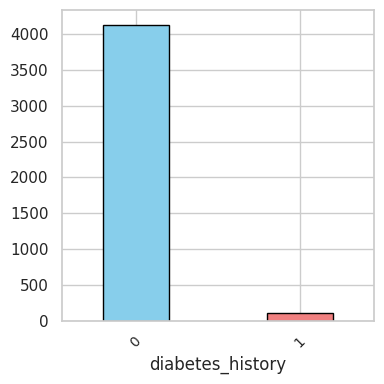

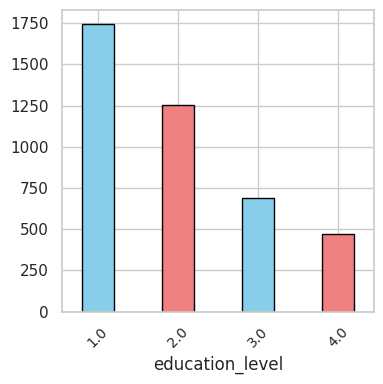

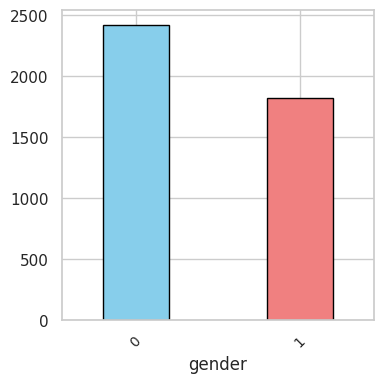

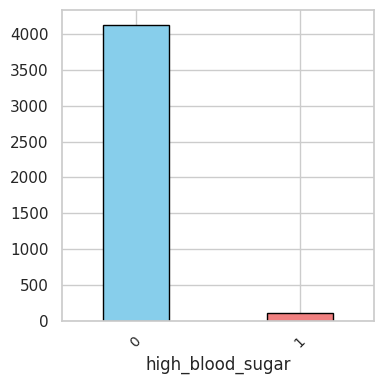

In [ ]:
def get_attribute_statistics_discrete(dataset: pd.DataFrame):
    discrete_values = [col for col in dataset if attribute_labels[col]==DISCRETE]

    df_discrete_vals = pd.DataFrame({
        'index': discrete_values,
        'count': [dataset[col].count() for col in discrete_values],
        'no_unique_values': [dataset[col].nunique() for col in discrete_values],
        'value_counts': [dataset[col].value_counts().to_dict() for col in discrete_values]
    })

    print("Description table for discrete variables:")
    HelperPlots.plot_description_table(df_discrete_vals, title="Heart Disease Discrete Variables", outputname=HEART_DISCRETE_VARS_TABLE, figsize=(14, 5))

    print("Barplots for discrete variables:")
    HelperPlots.plot_barplot_for_discrete(dataset[discrete_values], values=discrete_values, outputname=HEART_DISCRETE_VARS_BARPLOT, figsize=(4, 4))

get_attribute_statistics_discrete(dataset)

### 1.3. Plotting distribution for target label

Barplot for label variable


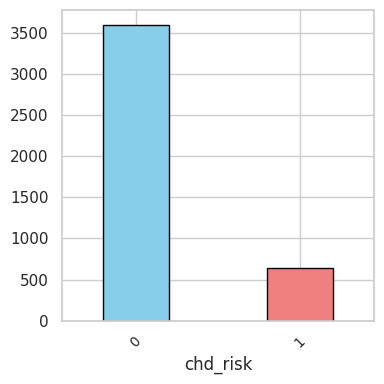

In [ ]:
def get_label_statistics(dataset: pd.DataFrame):
    label_values = [col for col in dataset if attribute_labels[col]==LABEL]

    print("Barplot for label variable")
    HelperPlots.plot_barplot_for_discrete(dataset[label_values], label_values, HEART_LABEL_VARS_BARPLOT)

get_label_statistics(dataset)

### 1.4. Analyzing correlation matrix and chi-squared test results

Correlation matrix for continuous variables:


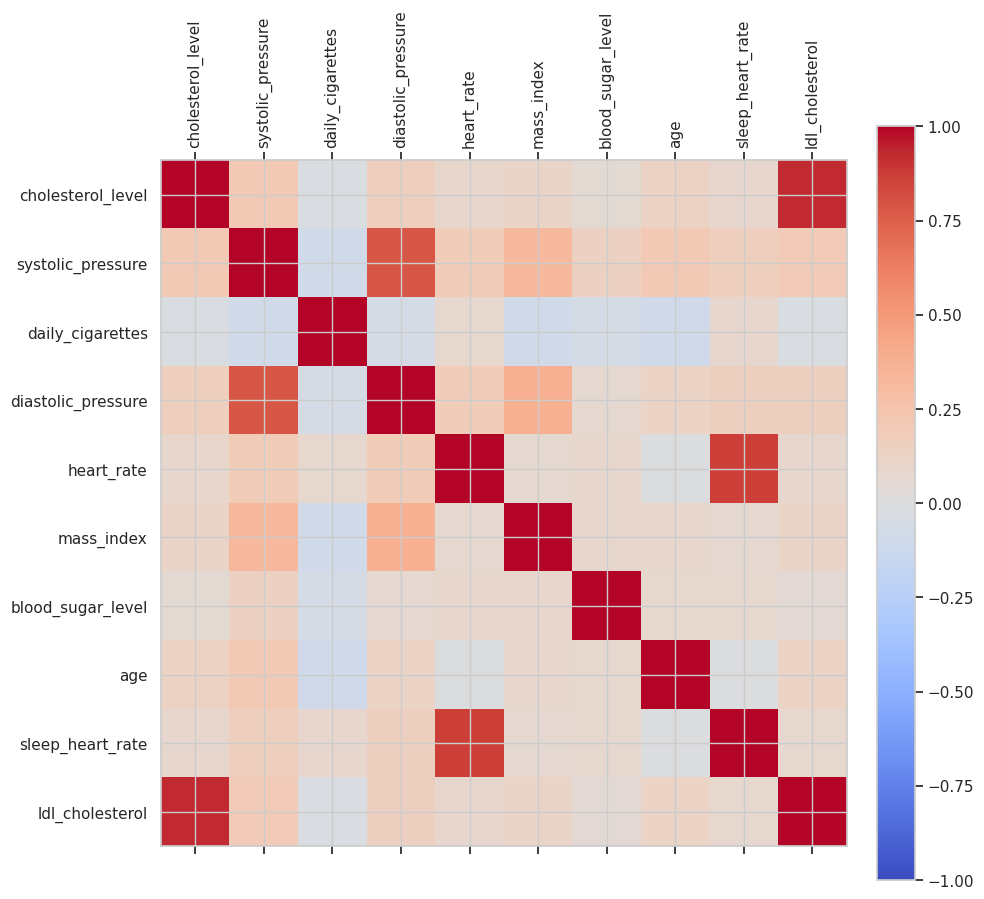

Correlation matrix for discrete variables:


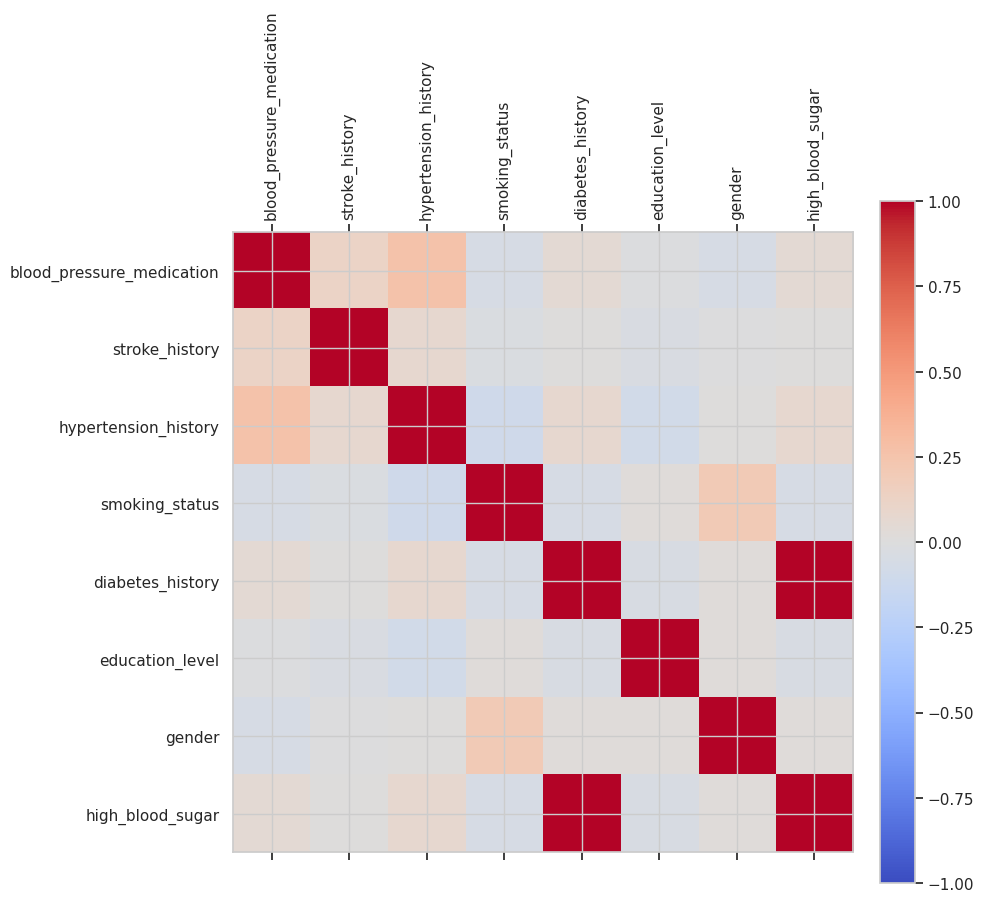

Chi-square test results for all pairs of discrete variables:


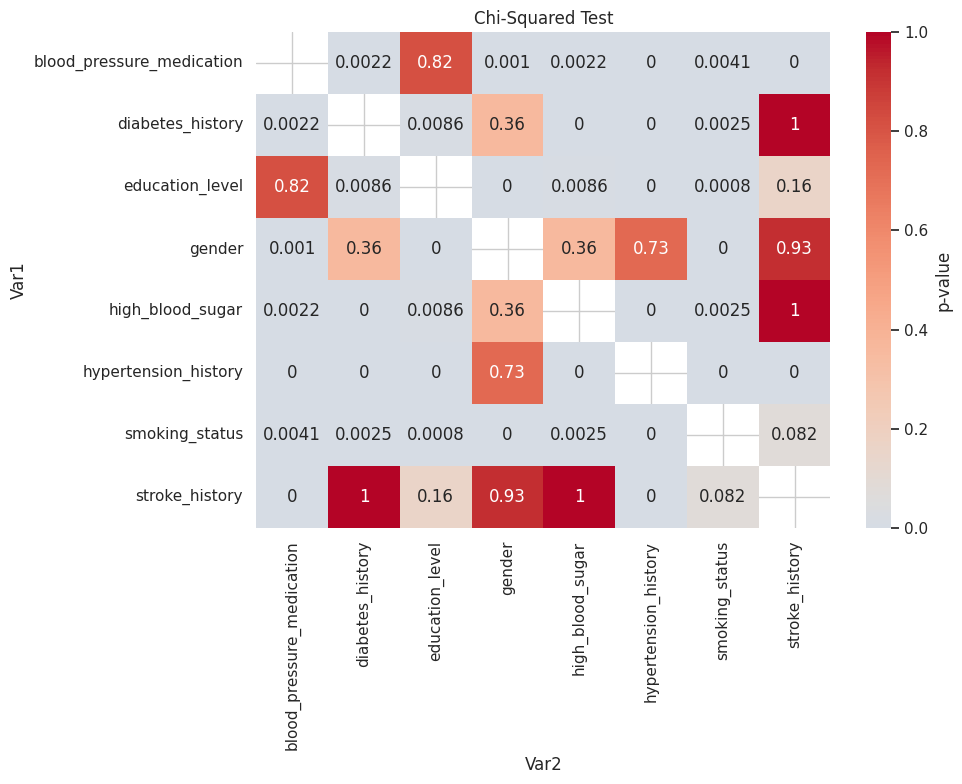

In [ ]:
from chi_square_helper import chi_square_all_pairs

def get_correlation_statistics(dataset: pd.DataFrame):
    continuous_values = [col for col in dataset if attribute_labels[col]==CONTINUE]
    discrete_values = [col for col in dataset if attribute_labels[col]==DISCRETE]

    print("Correlation matrix for continuous variables:")
    correlation_matrix_continuous = dataset[continuous_values].corr(method='pearson')
    HelperPlots.plot_correlation_matrix(correlation_matrix_continuous, HEART_CORRELATION_MATRIX_CONTINUOUS)

    print("Correlation matrix for discrete variables:")
    correlation_matrix_discrete = dataset[discrete_values].corr(method='pearson')
    HelperPlots.plot_correlation_matrix(correlation_matrix_discrete, HEART_CORRELATION_MATRIX_DISCRETE)

    print("Chi-square test results for all pairs of discrete variables:")
    df = chi_square_all_pairs(dataset, discrete_values, alpha=0.05)
    HelperPlots.plot_chi_pvals_matrix(df, outputname=HEART_CHI_SQUARE_RESULTS, figsize=(10, 8), value='p-value')

get_correlation_statistics(dataset)

---
## 2. Data preprocessing